In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LeakyReLU
from tensorflow.keras.optimizers import Adam

In [42]:
data = pd.read_csv('Final_pred.csv')
data.head()

,Battery Pack Voltage (V),Battery Current (A),Battery Capacity (Kwh),Internal Resistance (ohm),Voc,SoC (%),Full Charge Battery Capacity (kwh),SoH (%),Available Energy (kwh),Power Drawn (W),Power (kW),Charge Current Capacity (Ah),Duration (hrs),Remainig Energy (kwh),Range150 (km),Speed (km/hr),Range145 (km),Speed (km/hr).1,Range140 (km),Speed (km/hr).2
0,56.78,7.51,0.426418,0.250000,58.657500,99.298030,3.183216,99.298030,2.937213,426.4178,0.426418,54.4,7.243675,0.423424,150.0,20.707721,145.0,20.017463,140.0,19.327206
1,56.34,7.51,0.423113,0.125698,57.283994,92.531992,3.183216,92.531992,2.937218,423.1134,0.423113,54.4,7.243675,0.391515,150.0,20.707721,145.0,20.017463,140.0,19.327206
2,56.34,7.51,0.423113,0.188547,57.755992,94.857102,3.183216,94.857102,2.937218,423.1134,0.423113,54.4,7.243675,0.401353,150.0,20.707721,145.0,20.017463,140.0,19.327206
3,56.78,7.51,0.426418,0.178667,58.121787,96.659048,3.183216,96.659048,2.937588,426.4178,0.426418,54.4,7.243675,0.412171,150.0,20.707721,145.0,20.017463,140.0,19.327206
4,56.78,7.53,0.427553,0.251404,58.673076,99.374758,3.183216,99.374758,2.944098,427.5534,0.427553,54.4,7.224436,0.424880,150.0,20.762868,145.0,20.070772,140.0,19.378676


In [43]:
data = data.dropna()
data.head()

,Battery Pack Voltage (V),Battery Current (A),Battery Capacity (Kwh),Internal Resistance (ohm),Voc,SoC (%),Full Charge Battery Capacity (kwh),SoH (%),Available Energy (kwh),Power Drawn (W),Power (kW),Charge Current Capacity (Ah),Duration (hrs),Remainig Energy (kwh),Range150 (km),Speed (km/hr),Range145 (km),Speed (km/hr).1,Range140 (km),Speed (km/hr).2
0,56.78,7.51,0.426418,0.250000,58.657500,99.298030,3.183216,99.298030,2.937213,426.4178,0.426418,54.4,7.243675,0.423424,150.0,20.707721,145.0,20.017463,140.0,19.327206
1,56.34,7.51,0.423113,0.125698,57.283994,92.531992,3.183216,92.531992,2.937218,423.1134,0.423113,54.4,7.243675,0.391515,150.0,20.707721,145.0,20.017463,140.0,19.327206
2,56.34,7.51,0.423113,0.188547,57.755992,94.857102,3.183216,94.857102,2.937218,423.1134,0.423113,54.4,7.243675,0.401353,150.0,20.707721,145.0,20.017463,140.0,19.327206
3,56.78,7.51,0.426418,0.178667,58.121787,96.659048,3.183216,96.659048,2.937588,426.4178,0.426418,54.4,7.243675,0.412171,150.0,20.707721,145.0,20.017463,140.0,19.327206
4,56.78,7.53,0.427553,0.251404,58.673076,99.374758,3.183216,99.374758,2.944098,427.5534,0.427553,54.4,7.224436,0.424880,150.0,20.762868,145.0,20.070772,140.0,19.378676


In [44]:
# Check remaining columns
print("Remaining columns after cleanup:")
print(data.columns)

Remaining columns after cleanup:
Index(['Battery Pack Voltage (V)', 'Battery Current (A)',
       'Battery Capacity (Kwh)', 'Internal Resistance (ohm)', 'Voc', 'SoC (%)',
       'Full Charge Battery Capacity (kwh)', 'SoH (%)',
       'Available Energy (kwh)', 'Power Drawn (W)', 'Power (kW)',
       'Charge Current Capacity (Ah)', 'Duration (hrs)',
       'Remainig Energy (kwh)', 'Range150 (km)', 'Speed (km/hr)',
       'Range145 (km)', 'Speed (km/hr).1', 'Range140 (km)', 'Speed (km/hr).2'],
      dtype='object')


In [45]:
data['Full_Battery_Voltage'] = 58.8
data['Minimum_Battery_Voltage'] = 38.5

In [46]:
data.shape

(1820, 22)

In [47]:
# Adding constant values for Full Battery Voltage and Minimum Battery Voltage
data['Full_Battery_Voltage'] = 58.8
data['Minimum_Battery_Voltage'] = 38.5

In [48]:
# Defining input variables for each target
X_soc = data[['Voc', 'Full_Battery_Voltage', 'Minimum_Battery_Voltage']]  # For SoC
X_soh = data[['Available Energy (kwh)', 'Full Charge Battery Capacity (kwh)']]  # For SoH
X_duration = data[['Battery Current (A)', 'Charge Current Capacity (Ah)']]  # For Duration
X_speed = data[['Duration (hrs)', 'Range150 (km)', 'Range145 (km)', 'Range140 (km)']]  # For Speed

In [49]:
# Target variables
y_soc = data['SoC (%)']
y_soh = data['SoH (%)']
y_duration = data['Duration (hrs)']
y_speed = data['Speed (km/hr)']

In [50]:
# Splitting the data into training and test sets for each input group
X_train_soc, X_test_soc, y_train_soc, y_test_soc = train_test_split(X_soc, y_soc, test_size=0.2, random_state=42)
X_train_soh, X_test_soh, y_train_soh, y_test_soh = train_test_split(X_soh, y_soh, test_size=0.2, random_state=42)
X_train_duration, X_test_duration, y_train_duration, y_test_duration = train_test_split(X_duration, y_duration, test_size=0.2, random_state=42)
X_train_speed, X_test_speed, y_train_speed, y_test_speed = train_test_split(X_speed, y_speed, test_size=0.2, random_state=42)


In [51]:
# Standardizing the data for each input group
scaler = StandardScaler()
X_train_soc_scaled = scaler.fit_transform(X_train_soc)
X_test_soc_scaled = scaler.transform(X_test_soc)

X_train_soh_scaled = scaler.fit_transform(X_train_soh)
X_test_soh_scaled = scaler.transform(X_test_soh)

X_train_duration_scaled = scaler.fit_transform(X_train_duration)
X_test_duration_scaled = scaler.transform(X_test_duration)

X_train_speed_scaled = scaler.fit_transform(X_train_speed)
X_test_speed_scaled = scaler.transform(X_test_speed)


In [52]:
# Define the input layers for each target variable
soc_input = Input(shape=(X_train_soc_scaled.shape[1],))  # For Voc, Full_Battery_Voltage, Minimum_Battery_Voltage
soh_input = Input(shape=(X_train_soh_scaled.shape[1],))  # For Available_Energy and Full_Charge_Battery_Capacity
duration_input = Input(shape=(X_train_duration_scaled.shape[1],))  # For Battery_Current and Charge_Current_Capacity
speed_input = Input(shape=(X_train_speed_scaled.shape[1],))  # For Duration, Range150, Range145, Range140


In [53]:
# Define branches for each target variable
soc_branch = Dense(32)(soc_input)
soc_branch = LeakyReLU()(soc_branch)
soc_output = Dense(1, activation='linear', name='soc_output')(soc_branch)

soh_branch = Dense(32)(soh_input)
soh_branch = LeakyReLU()(soh_branch)
soh_output = Dense(1, activation='linear', name='soh_output')(soh_branch)

duration_branch = Dense(32)(duration_input)
duration_branch = LeakyReLU()(duration_branch)
duration_output = Dense(1, activation='linear', name='duration_output')(duration_branch)

speed_branch = Dense(32)(speed_input)
speed_branch = LeakyReLU()(speed_branch)
speed_output = Dense(1, activation='linear', name='speed_output')(speed_branch)

# Combine the branches into a single model with multiple inputs and outputs
model = Model(inputs=[soc_input, soh_input, duration_input, speed_input], 
              outputs=[soc_output, soh_output, duration_output, speed_output])

# Compile the model (providing separate metrics for each output)
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='mse', 
              metrics={'soc_output': 'mae',  # Mean Absolute Error for regression
                       'soh_output': 'mae', 
                       'duration_output': 'mae', 
                       'speed_output': 'mae'})

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 3)]                  0         []                            
                                                                                                  
 input_6 (InputLayer)        [(None, 2)]                  0         []                            
                                                                                                  
 input_7 (InputLayer)        [(None, 2)]                  0         []                            
                                                                                                  
 input_8 (InputLayer)        [(None, 4)]                  0         []                            
                                                                                            

In [54]:
# Training the model with 200 epochs
history = model.fit(
    [X_train_soc_scaled, X_train_soh_scaled, X_train_duration_scaled, X_train_speed_scaled],
    [y_train_soc, y_train_soh, y_train_duration, y_train_speed],
    epochs=200, 
    batch_size=32, 
    validation_data=([X_test_soc_scaled, X_test_soh_scaled, X_test_duration_scaled, X_test_speed_scaled], 
                     [y_test_soc, y_test_soh, y_test_duration, y_test_speed]),
    verbose=2  # Set verbosity to 2 for a more concise output
)

Epoch 1/200
46/46 - 2s - loss: 18505.6465 - soc_output_loss: 8299.9141 - soh_output_loss: 8312.8887 - duration_output_loss: 21.6824 - speed_output_loss: 1871.1593 - soc_output_mae: 90.9895 - soh_output_mae: 91.0726 - duration_output_mae: 4.3479 - speed_output_mae: 40.0568 - val_loss: 18453.8105 - val_soc_output_loss: 8272.3174 - val_soh_output_loss: 8284.9883 - val_duration_output_loss: 20.5393 - val_speed_output_loss: 1875.9640 - val_soc_output_mae: 90.8230 - val_soh_output_mae: 90.9093 - val_duration_output_mae: 4.2070 - val_speed_output_mae: 39.8795 - 2s/epoch - 45ms/step
Epoch 2/200
46/46 - 0s - loss: 18317.4551 - soc_output_loss: 8229.0479 - soh_output_loss: 8243.3184 - duration_output_loss: 17.9831 - speed_output_loss: 1827.1068 - soc_output_mae: 90.5917 - soh_output_mae: 90.6891 - duration_output_mae: 3.9380 - speed_output_mae: 39.5855 - val_loss: 18248.8359 - val_soc_output_loss: 8190.1187 - val_soh_output_loss: 8213.2256 - val_duration_output_loss: 16.3955 - val_speed_output_l

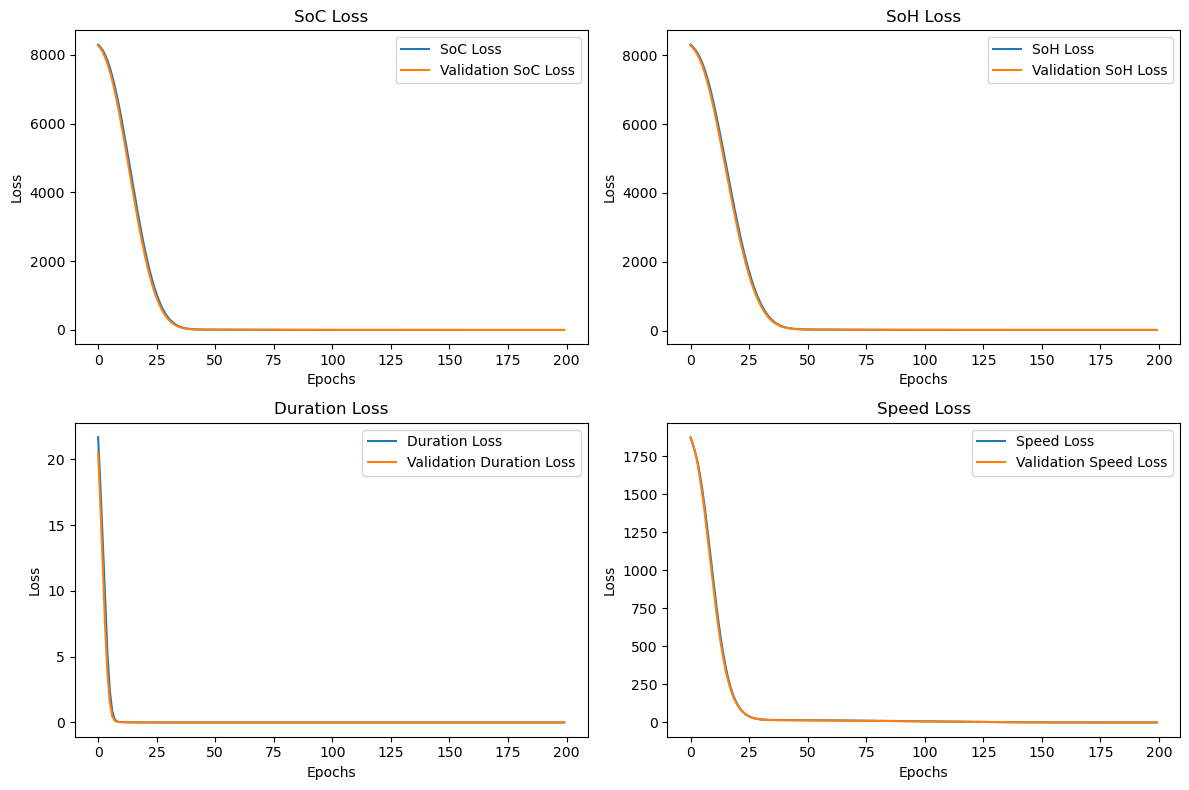

In [55]:
# Plotting the training and validation loss and mae
plt.figure(figsize=(12, 8))

# Loss Plot
plt.subplot(2, 2, 1)
plt.plot(history.history['soc_output_loss'], label='SoC Loss')
plt.plot(history.history['val_soc_output_loss'], label='Validation SoC Loss')
plt.title('SoC Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(history.history['soh_output_loss'], label='SoH Loss')
plt.plot(history.history['val_soh_output_loss'], label='Validation SoH Loss')
plt.title('SoH Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(history.history['duration_output_loss'], label='Duration Loss')
plt.plot(history.history['val_duration_output_loss'], label='Validation Duration Loss')
plt.title('Duration Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(history.history['speed_output_loss'], label='Speed Loss')
plt.plot(history.history['val_speed_output_loss'], label='Validation Speed Loss')
plt.title('Speed Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

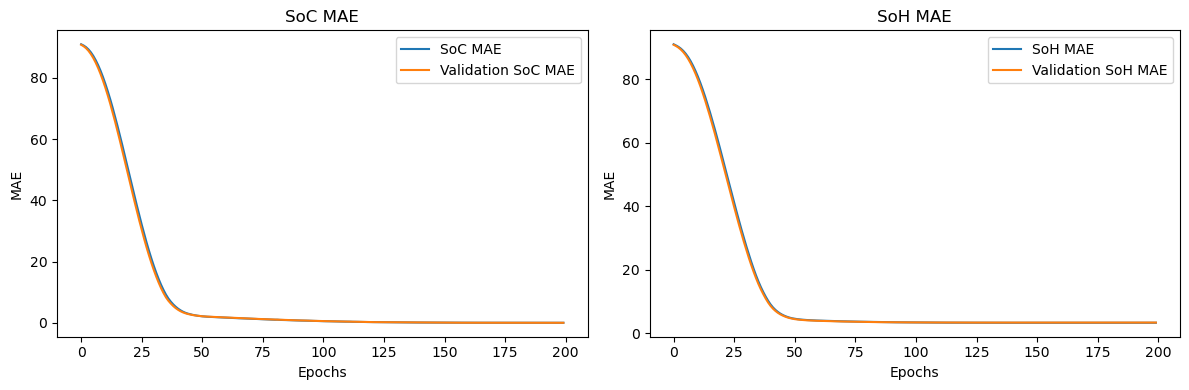

In [56]:
# Plotting MAE
plt.figure(figsize=(12, 4))

# MAE plot
plt.subplot(1, 2, 1)
plt.plot(history.history['soc_output_mae'], label='SoC MAE')
plt.plot(history.history['val_soc_output_mae'], label='Validation SoC MAE')
plt.title('SoC MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['soh_output_mae'], label='SoH MAE')
plt.plot(history.history['val_soh_output_mae'], label='Validation SoH MAE')
plt.title('SoH MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()


In [58]:
import seaborn as sns

# Dropping empty rows and columns
data.dropna(axis=0, how='any', inplace=True)  # Drop any rows with NaN values
data.dropna(axis=1, how='all', inplace=True)  # Drop columns that are completely empty


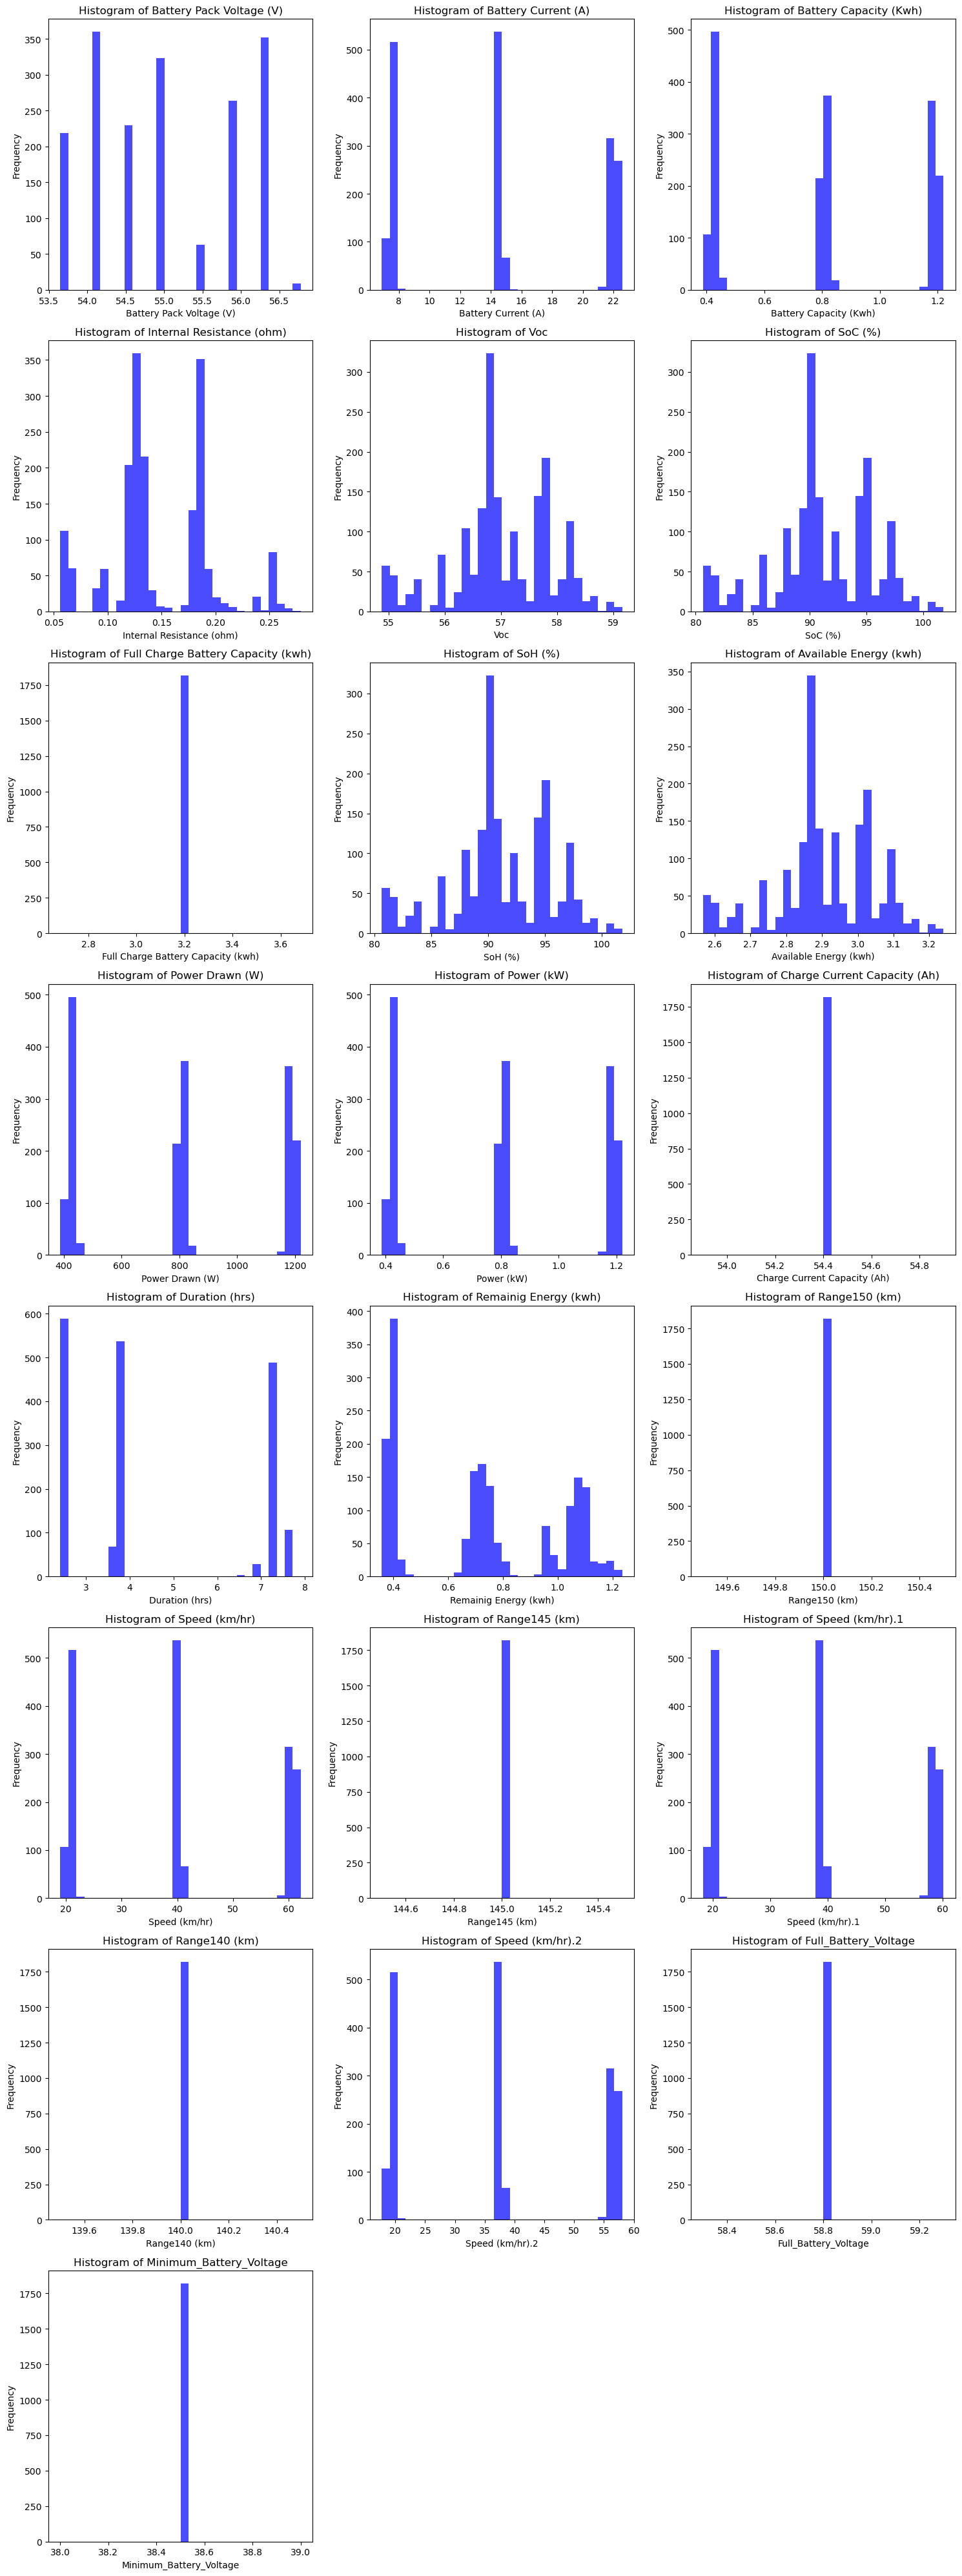

In [59]:
# Visualizing the dataset
# Histogram for numerical features
num_cols = data.select_dtypes(include=[np.number]).columns.tolist()  # Get numerical columns

# Calculate the number of rows and columns for subplots
num_plots = len(num_cols)
ncols = 3  # Number of columns in the subplot
nrows = (num_plots // ncols) + (num_plots % ncols > 0)  # Calculate rows needed

plt.figure(figsize=(15, 5 * nrows))
for i, col in enumerate(num_cols):
    plt.subplot(nrows, ncols, i + 1)
    plt.hist(data[col], bins=30, alpha=0.7, color='blue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

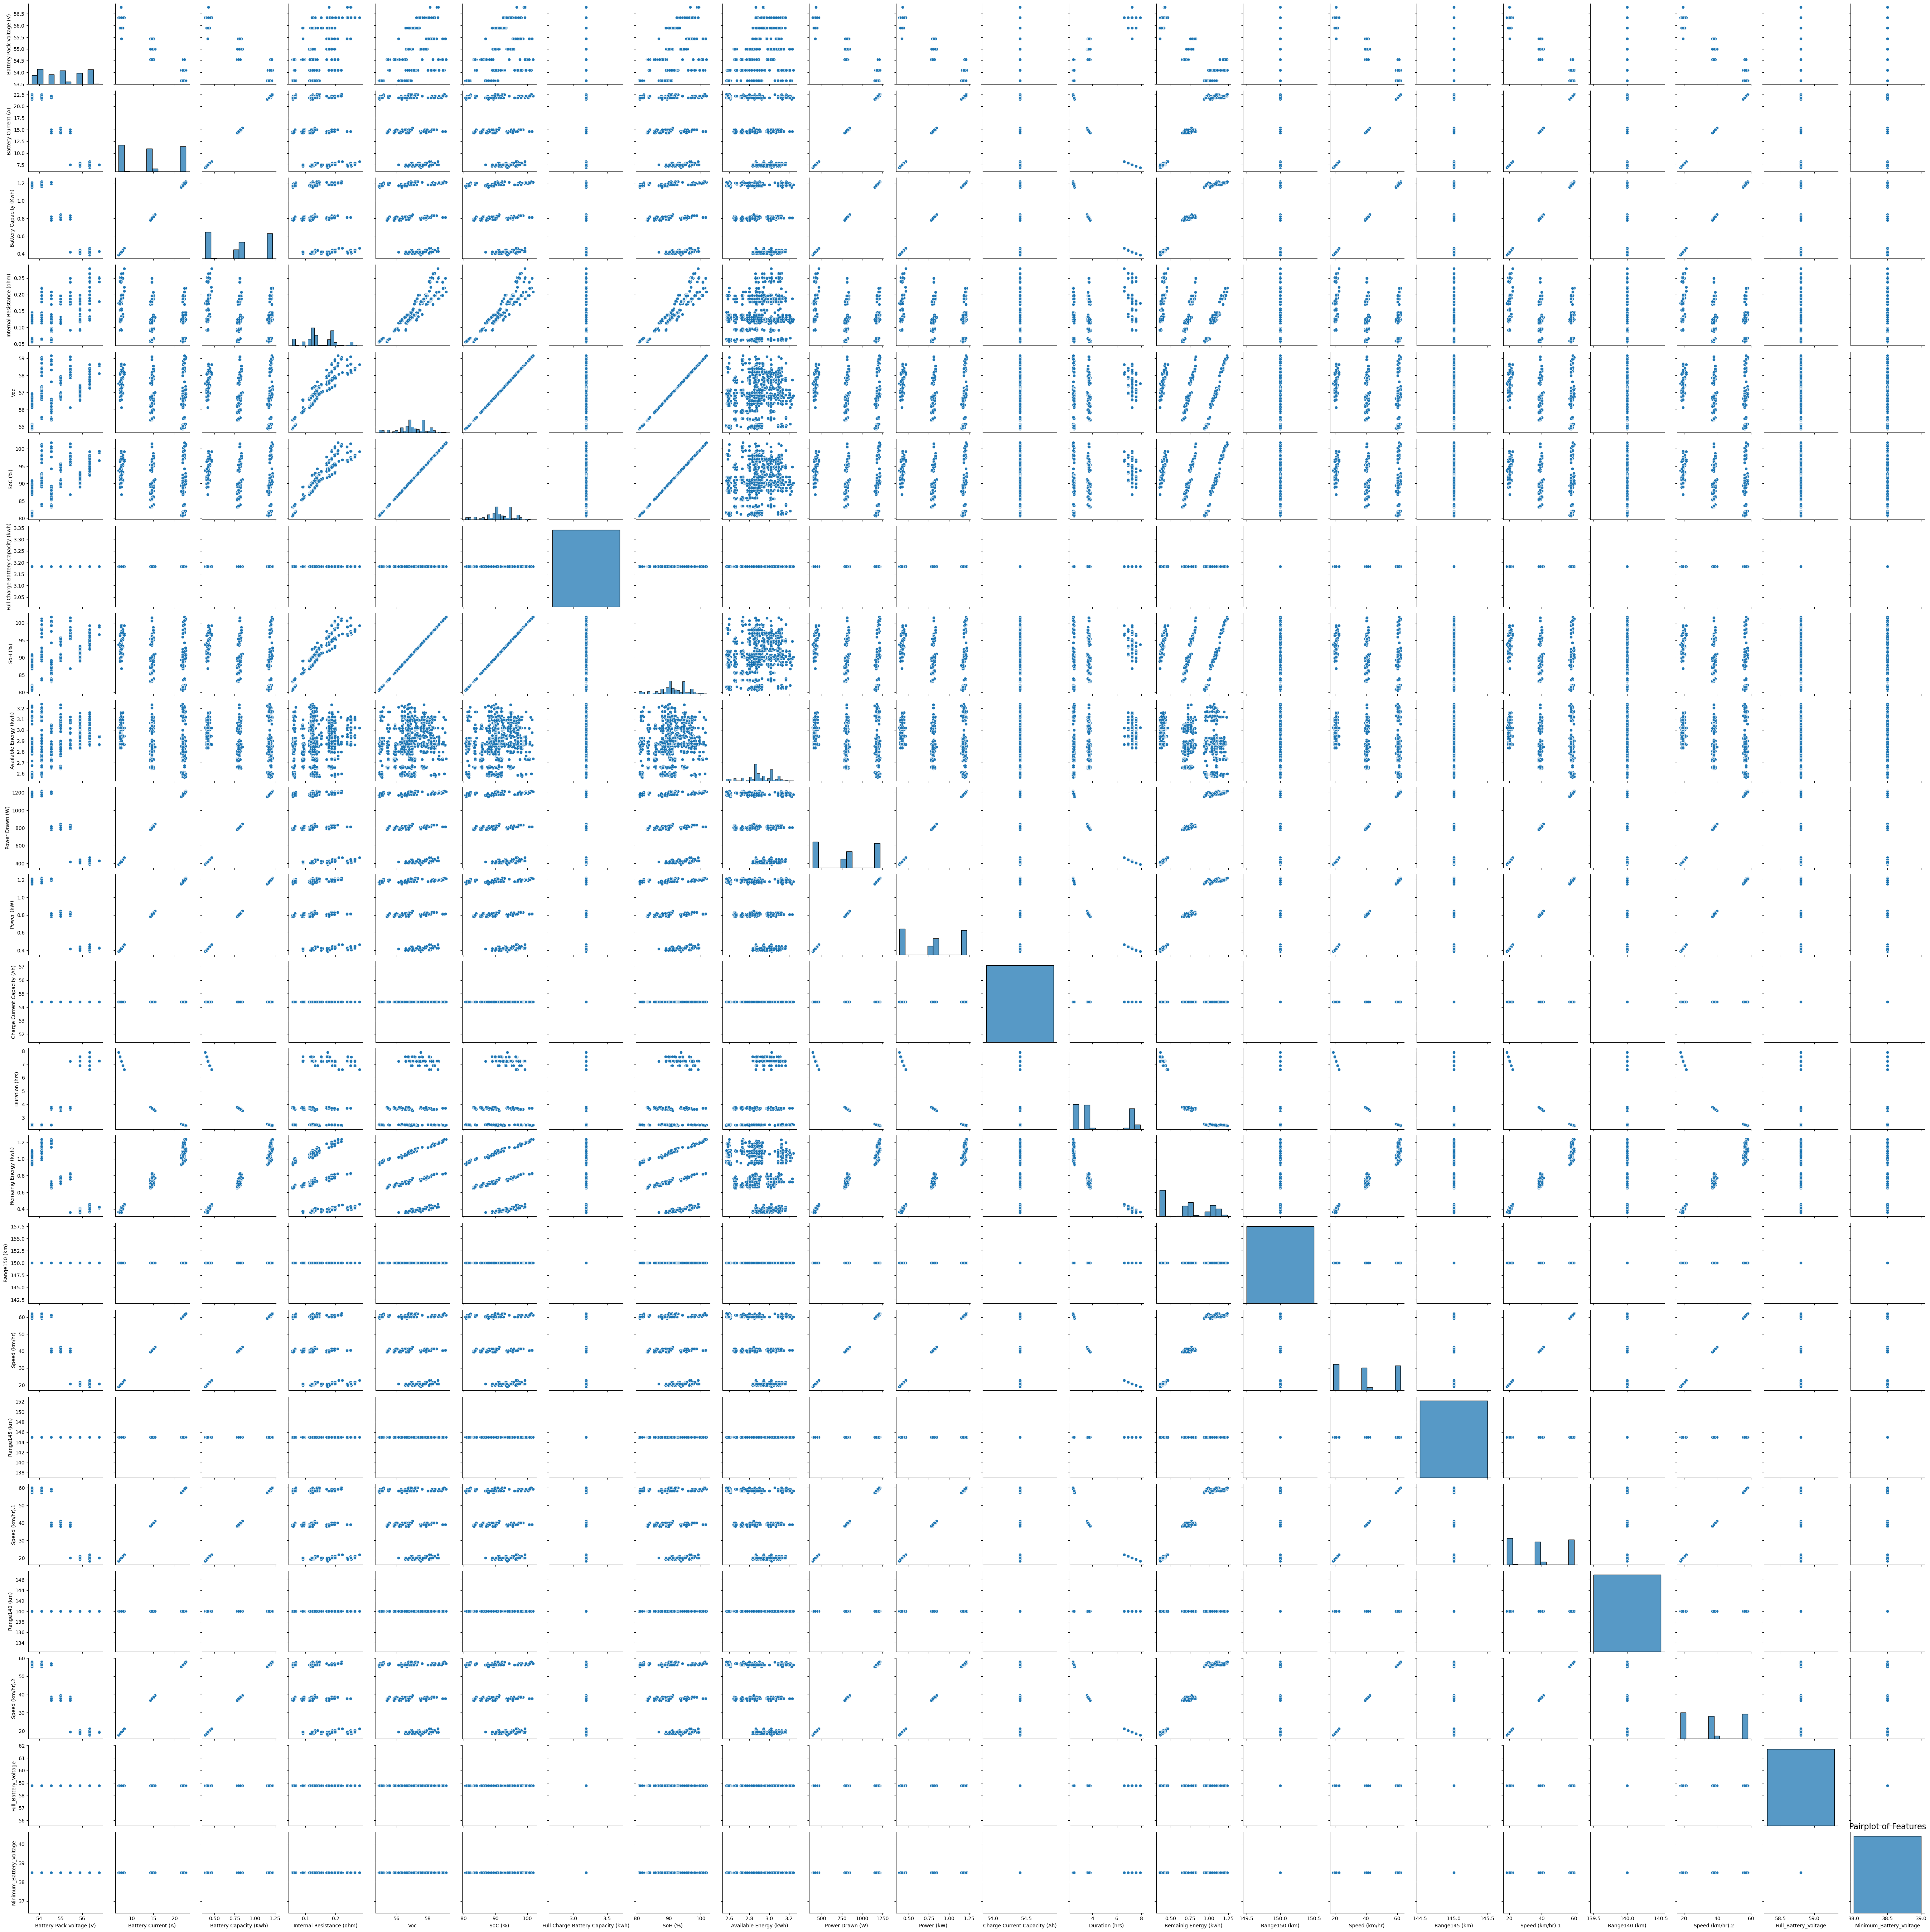

In [60]:
# Pairplot to visualize relationships between features
# Adjust the columns based on your dataset
sns.pairplot(data)
plt.title('Pairplot of Features', fontsize=16)
plt.show()

C:\Users\91814\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


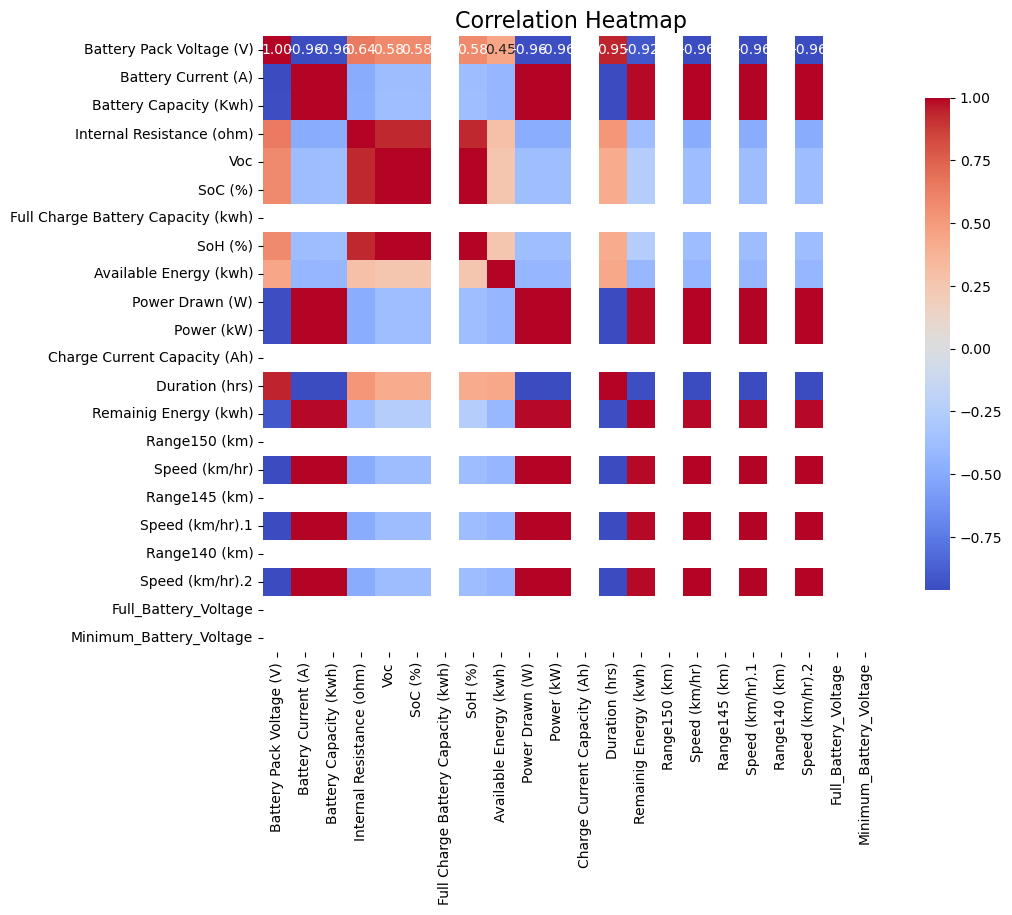

In [61]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


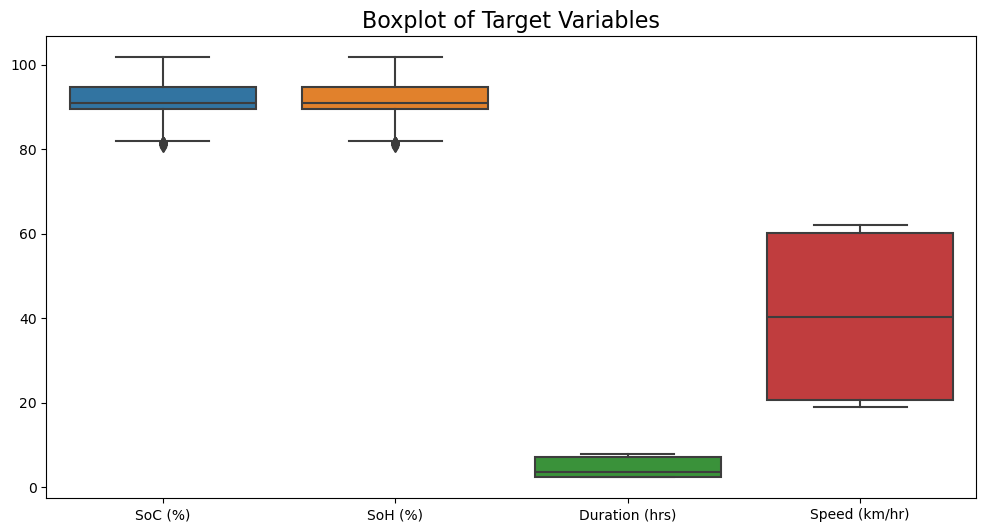

In [62]:
# Boxplot for target variables (adjust according to your dataset)
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['SoC (%)', 'SoH (%)', 'Duration (hrs)', 'Speed (km/hr)']])
plt.title('Boxplot of Target Variables', fontsize=16)
plt.show()

In [63]:
# Making predictions on the test set for each output
y_pred_soc, y_pred_soh, y_pred_duration, y_pred_speed = model.predict([X_test_soc_scaled, X_test_soh_scaled, X_test_duration_scaled, X_test_speed_scaled])

# Displaying the first few rows of predictions vs actual values for SoC, SoH, Duration, Speed
for i in range(5):
    print(f"Actual SoC: {y_test_soc.iloc[i]}, Predicted SoC: {y_pred_soc[i]}")
    print(f"Actual SoH: {y_test_soh.iloc[i]}, Predicted SoH: {y_pred_soh[i]}")
    print(f"Actual Duration: {y_test_duration.iloc[i]}, Predicted Duration: {y_pred_duration[i]}")
    print(f"Actual Speed: {y_test_speed.iloc[i]}, Predicted Speed: {y_pred_speed[i]}")
    print("---------------------------------------------------")

12/12 [==============================] - 0s 3ms/step
Actual SoC: 97.23863496, Predicted SoC: [97.22762]
Actual SoH: 97.23863495, Predicted SoH: [90.65629]
Actual Duration: 2.452660054, Predicted Duration: [2.4535966]
Actual Speed: 61.15808824, Predicted Speed: [60.975445]
---------------------------------------------------
Actual SoC: 95.36960217, Predicted SoC: [95.360954]
Actual SoH: 95.36960216, Predicted SoH: [91.657326]
Actual Duration: 3.71331058, Predicted Duration: [3.715057]
Actual Speed: 40.39522059, Predicted Speed: [40.380302]
---------------------------------------------------
Actual SoC: 94.57647322, Predicted SoC: [94.56883]
Actual SoH: 94.57647323, Predicted SoH: [91.84559]
Actual Duration: 7.224435591, Predicted Duration: [7.2323093]
Actual Speed: 20.76286765, Predicted Speed: [20.720617]
---------------------------------------------------
Actual SoC: 92.0100893, Predicted SoC: [92.0057]
Actual SoH: 92.01008929, Predicted SoH: [91.33324]
Actual Duration: 7.566063978, P